这个文件，主要用于观察数据和提取(sid, score)。提取数据部分内容集中在最后四个block中。主要实现了列提取，按sida

In [6]:
data = read.table("./test_data/ad-ende-good-stnd.csv", header = TRUE)
data

HITId,WorkerId,Input.src,Input.trg,Input.item,hit,sys_id,rid,type,sid,score,time
1759,chanberg_chantal.amrhein@uzh.ch,en,de,ad,1759,RWTH-nmt-ensemble.4921,NA,SYSTEM,1467,0.22573164,42.1
1768,lmu-simon_riess.simon@yahoo.de,en,de,ad,1768,uedin-nmt.4722,NA,SYSTEM,586,0.48791593,26.0
1768,lmu-simon_riess.simon@yahoo.de,en,de,ad,1768,PROMT-Rule-based.4735,NA,SYSTEM,1018,0.18072139,23.9
1768,lmu-simon_riess.simon@yahoo.de,en,de,ad,1768,C-3MA.4959,NA,SYSTEM,1540,-1.93124103,19.1
1768,lmu-simon_riess.simon@yahoo.de,en,de,ad,1768,SYSTRAN.4847,NA,SYSTEM,2237,-0.01127519,12.6
1768,lmu-simon_riess.simon@yahoo.de,en,de,ad,1768,online-G.0,NA,SYSTEM,1480,-0.97125811,14.1
1775,lmu-simon_riess.simon@yahoo.de,en,de,ad,1775,LMU-nmt-reranked.4934,NA,SYSTEM,788,-1.12485538,12.9
1775,lmu-simon_riess.simon@yahoo.de,en,de,ad,1775,RWTH-nmt-ensemble.4921,NA,SYSTEM,1913,-1.54724786,16.2
1775,lmu-simon_riess.simon@yahoo.de,en,de,ad,1775,uedin-nmt.4722,NA,SYSTEM,1961,0.91030841,24.9
1782,cfedermann_cfedermann@gmail.com,en,de,ad,1782,LIUM-NMT.4900,NA,BAD_REF,759,-1.34074853,16.9


- 可以看出针对一个句子，并不是每个MT都有对应的分数，而有一些MT可能拥有多个分数(因为有多个人对这个译文进行评分)

In [7]:
summary(data)

     HITId                                      WorkerId    Input.src 
 Min.   :1625   mhuck_mhuck@cis.lmu.de              :2028   en:11900  
 1st Qu.:1660   lmu-simon_riess.simon@yahoo.de      :1209             
 Median :1741   chanberg_chantal.amrhein@uzh.ch     :1100             
 Mean   :2532   yvesscherrer_yves.scherrer@gmail.com:1010             
 3rd Qu.:2148   Natalia_Natalia.Zheleznyak@promt.ru :1000             
 Max.   :5434   UE_Caelan_dark1thought@hotmail.co.uk: 740             
                (Other)                             :4813             
 Input.trg  Input.item      hit                          sys_id    
 de:11900   ad:11900   Min.   :1625   REFERENCE             : 835  
                       1st Qu.:1660   online-G.0            : 807  
                       Median :1741   SYSTRAN.4847          : 754  
                       Mean   :2532   C-3MA.4959            : 748  
                       3rd Qu.:2148   TALP-UPC.4834         : 737  
                       M

In [10]:
sys_data = subset(data, data$type == "SYSTEM", select = c(sys_id, sid, score))

- 我们只需要sys_id, sid, score这三列数据，用于提取文件

In [11]:
library("data.table")
sys_data = data.table(sys_data)
sys_data = sys_data[order(sys_data$sys_id)]
summary(sys_data$sys_id)

C-3MA.4959 fbk-nmt-combination.4870                 KIT.4950 
                     628                      525                      532 
           LIUM-NMT.4900    LMU-nmt-reranked.4934      LMU-nmt-single.4893 
                     546                      600                      477 
              online-A.0               online-B.0               online-F.0 
                     585                      590                      590 
              online-G.0    PROMT-Rule-based.4735                REFERENCE 
                     687                      610                        0 
  RWTH-nmt-ensemble.4921             SYSTRAN.4847            TALP-UPC.4834 
                     624                      630                      633 
          uedin-nmt.4722                 xmu.4910 
                     509                      626

为了方便数据读取，下面把这个文件按其mt系统的类型进行划分，分别存储到不同的文件中。其中的数据按照sid进行排序。这样在读取的时候，就只需要顺序读，读到没有的行就直接跳过就行了。 保存的文件，每一行的数据用逗号分隔开。

In [17]:
save.file = function(id){
  tmp = subset(sys_data, sys_data$sys_id == id, select = c(sid, score))
  tmp = tmp[order(tmp$sid)]
  write.table(tmp, file = id, row.names = FALSE, col.names = FALSE, sep = ",")
}

In [14]:
getwd()
setwd("./test_data")

[1] "/Users/ihuangyiran/Documents/Workplace_Python/MasterArbeit"

In [18]:
sys_id = unique(sys_data$sys_id)
sys_id = as.character(sys_id)

counter = 1
nu = length(sys_id)
while(counter <= nu ){
  save.file(sys_id[counter])
  counter = counter + 1
}

In [16]:
sys_id

[1] "C-3MA.4959"               "fbk-nmt-combination.4870"
 [3] "KIT.4950"                 "LIUM-NMT.4900"           
 [5] "LMU-nmt-reranked.4934"    "LMU-nmt-single.4893"     
 [7] "online-A.0"               "online-B.0"              
 [9] "online-F.0"               "online-G.0"              
[11] "PROMT-Rule-based.4735"    "RWTH-nmt-ensemble.4921"  
[13] "SYSTRAN.4847"             "TALP-UPC.4834"           
[15] "uedin-nmt.4722"           "xmu.4910"

### 下面部分是为readme服务的

In [22]:
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [24]:
library(ggplot2)

In [16]:
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

In [25]:
p_corr = ggplot(corr, aes(x = V1, y = V2))

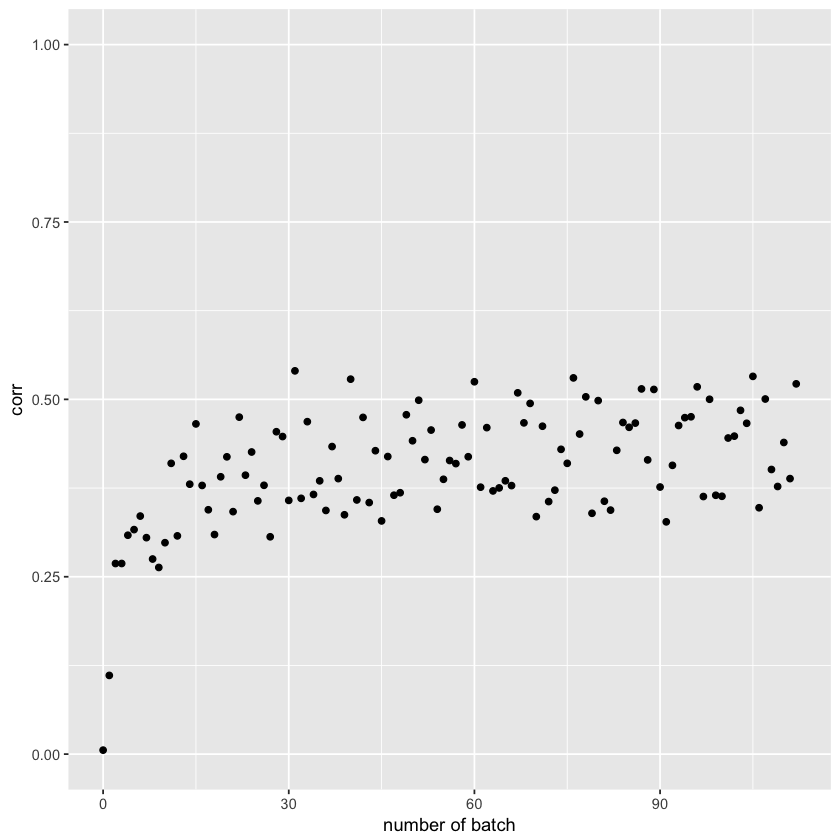

In [29]:
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

In [30]:
p_loss = ggplot(loss, aes(x = V1, y = V2))

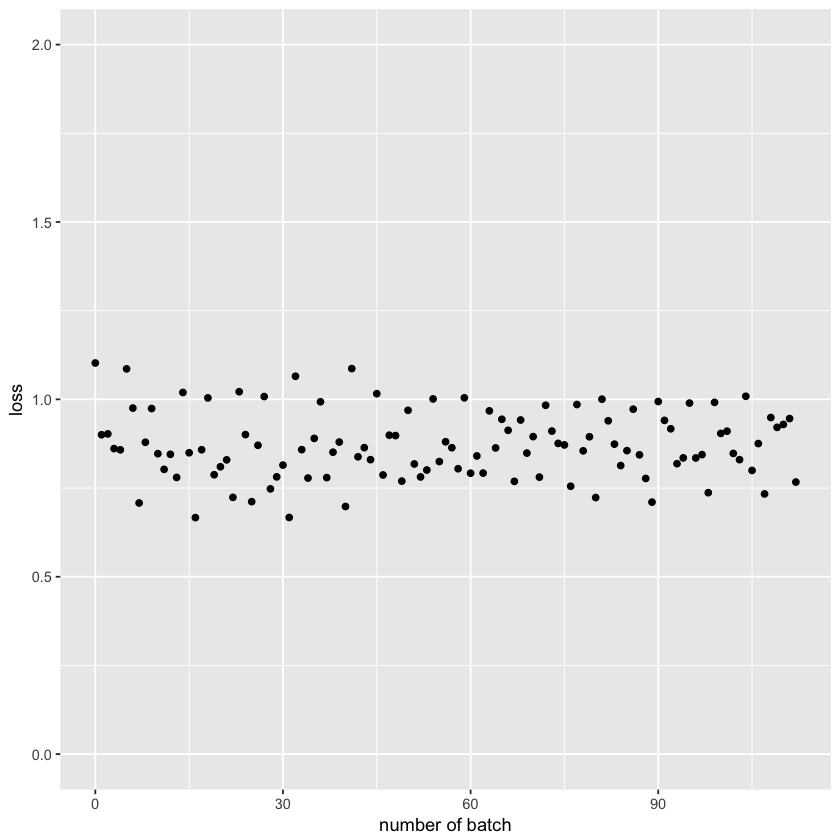

In [33]:
p_loss + geom_point() + xlab("number of batch") + ylab("loss") + ylim(0, max(loss$V2, 2))